In [19]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta
from itertools import compress
from mpl_toolkits.mplot3d import axes3d

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
date = '050116'
sat_no = ['ns41', 'ns54', 'ns56', 'ns59', 'ns60', 'ns61']
signal = "rate_proton_measured"
dd = 'decimal_day'

ar_data = []
ls_dict = []
for k in range(len(sat_no)):
    filename = sat_no[k] + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    
    dct = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        dct.update({x: f[ : , i : j] for column in head});
    ar_data.append(dct)
    
    split_columns = {}
    i = 0
    var = ar_data[k][signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
    ls_dict.append(split_columns)

In [25]:
x_cord = []
y_cord = []
for x in range(len(sat_no)):
    for j in range(len(ls_dict[x])):
        for k in range(len(ls_dict[x][j])):
            #if ls_dict[x][j][k] == np.max(ar_data[x][signal][:719]):
            # The condition above is to survey the first peak occuring at decimal_day = 17.5
            if ls_dict[x][j][k] == np.max(ar_data[x][signal]):
                y_cord.append(ar_data[x]['Geographic_Latitude'][k])
                x_cord.append(ar_data[x]['Geographic_Longitude'][k]) 
                print x, j, k, ar_data[x]['Geographic_Latitude'][k] , ar_data[x]['Geographic_Longitude'][k]
                ind =  '====>' + str(np.max(ar_data[x][signal]))
                print ind
                

0 3 1556 [ 37.3747] [-43.8255]
====>804.9417
1 3 1559 [-39.7294] [-38.2032]
====>3982.667
2 3 1548 [-31.804] [-90.8911]
====>2300.533
3 3 1559 [-44.587] [-149.2695]
====>5359.467
4 3 1565 [ 34.5878] [-173.8551]
====>3202.933
5 3 1568 [ 37.6153] [ 67.3264]
====>2213.6


blue 37.3747 -43.8255
red -39.7294 -38.2032
green -31.804 269.1089
magenta -44.587 210.7305
navy 34.5878 186.1449
yellow 37.6153 67.3264


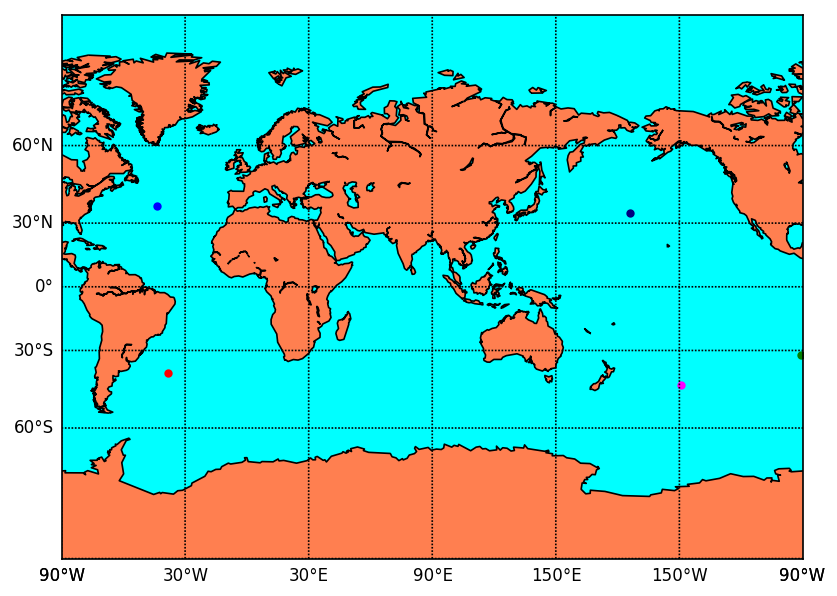

In [26]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

# miller projection
map = Basemap(projection='mill',lon_0=90)
plt.figure(figsize=(8, 6), dpi=120);
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
# CS=map.nightshade(date)

# Plot the Earthquake event on the map
colour = ['blue', 'red', 'green', 'magenta', 'navy', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

for i in range(len(x_cord)):
    lon = x_cord[i][0]
    lat = y_cord[i][0]
    if lon < -90:
        lon = 360 + x_cord[i][0]
    x,y = map(lon,lat);
    #map.scatter(x,y,s=300,marker='o',color='g',alpha=1);
    map.scatter(x,y,s=16,marker='o',color= colour[i],alpha=1);
    print colour[i] , lat, lon